# Playing with Classifiers

## Integration test with Genetic Search
This section of notebook tests checks that classifiers can be used with Genetic Search. It is essentially the pipe example for segmentors, but using classifiers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from see import classifiers
from sklearn.datasets import make_moons #, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

algorithm_space = classifiers.Classifier.algorithmspace
X, y = make_moons(noise=0.3, random_state=0)

In [2]:
from see.classifiers import Classifier
from see.classifier_fitness import ClassifierFitness
from sklearn.datasets import make_moons #, make_circles, make_classification
from sklearn.model_selection import train_test_split
from see.Workflow import workflow

workflow.addalgos([Classifier, ClassifierFitness])
wf = workflow()
print(wf)


<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001



In [3]:
from see.base_classes import pipedata
from sklearn.model_selection import train_test_split

individual = Classifier()

dataset = pipedata()
training_set = pipedata()
testing_set = pipedata()

training_set.X = X[:-1]
training_set.y = y[:-1]
testing_set.X = [X[-1]]
testing_set.y = [y[-1]]

dataset.training_set = training_set
dataset.testing_set = testing_set

individual.runAlgo(dataset)

data <see.base_classes.pipedata object at 0x7f03cfa77400>
<class 'see.classifiers.Classifier'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001

Time: 0.001 s


## Genetic Search with Classifiers

In [4]:
from see import GeneticSearch

In [5]:
mydata = dataset

In [6]:
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=5)

In [7]:
# warnings may appear when this runs
population = my_evolver.run(ngen=3)

Initializing a new random population
Generation 0/3 of population size 5
data <see.base_classes.pipedata object at 0x7f03cf812790>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 118
	alpha = 0.6046

predictions [0]
targets [0]
Time: 0.003 s
fitness=0

data <see.base_classes.pipedata object at 0x7f03cf8127f0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 244
	alpha = 0.9898

predictions [0]
targets [0]
Time: 0.001 s
fitness=0

data <see.base_classes.pipedata object at 0x7f03cf812910>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 29
	alpha = 0.3631

predictions [0]
targets [0]
Time: 0.0 s
fitness=0

data <see.base_classes.pipedata object at 0x7f03cf812a30>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 101
	alpha = 0.3692

predictions [0]
targets [0]
Time: 0.001 s
fitness=0

data <see.base_classes.pipedata object at 0x7f03c

## Playing with Classifiers
**This section of the notebook is not complete.**

This notebook is based on the notebook provided by the scikit learn package located at this [page](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) and provided at this [link](https://scikit-learn.org/stable/_downloads/3438aba177365cb595921cf18806dfa7/plot_classifier_comparison.ipynb).

The purpose of this notebook to recreate the example in the above notebook using the see implementation of the search space library for Classifiers.

TODO:
Integrate see-classify with Genetic Algorithms (i.e. `GeneticSearch`).

TypeError: cannot unpack non-iterable pipedata object

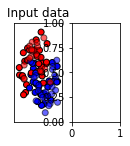

In [8]:
# Set up graph
h = 0.02
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(2, len(algorithm_space) + 1, 1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Input data")
# Draw subplots
for i, name in enumerate(algorithm_space):
    ax = plt.subplot(2, len(algorithm_space) + 1, i+2)
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # see-classify
    clf = algorithm_space[name]()
    predictions = clf.evaluate(dataset)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    
    # Print fitness score
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')


plt.tight_layout()
